#  Simple Linear Regression

# The goal to build a prediction model for Salary hike.

- The given sample dataset is a salary hike data set which displays the salaries of employees working for an organization having a praticular salary amount. Salary is calculated on the basis of years of working experience of the employee. 
- So, we have to make a pridiction model to pridict the salary of the employee of the basis of years of experience the employee.

In [16]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [17]:
#loading data i.e., storing data in a varable as data frame 
salary_df=pd.read_csv('Salary_Data.csv')
salary_df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<i><font color='green'>Here, we take YearsofExperince feature (independent variable) and Salary as Target (Dependent Variable)</font></i>

## EDA

In [18]:
#First we will check if the dataset contains any missing or null values
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


- There are no null values in the dataset

In [19]:
# Check for dupicates
salary_df[salary_df.duplicated()].shape

(0, 2)

- There are no duplicate values in the data set

In [20]:
# Analyse the measures of central tendencies
salary_df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
#Now we will check the correlation matrix using .corr() function.
salary_df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Visualizations

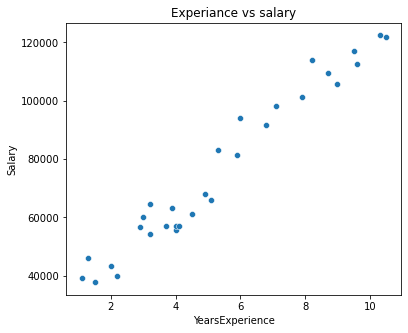

In [22]:
#Now we will plot a scatter plot to check the data in data set has any correlation between features and target. Since Bivariate
plt.figure(figsize=(6,5))
sns.scatterplot(data=salary_df,x='YearsExperience',y='Salary')
plt.title('Experiance vs salary');

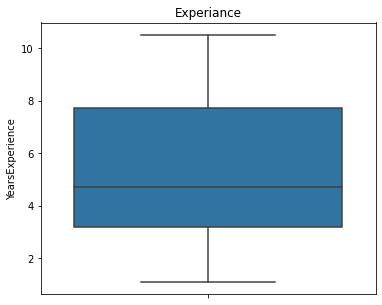

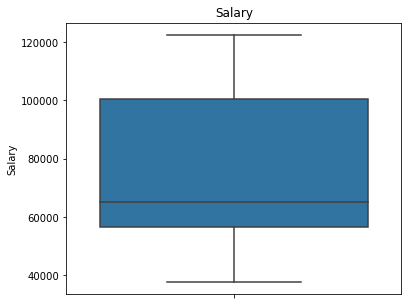

In [23]:
#Now we will check if the data contains any outliesrs usig boxplot
plt.figure(figsize=(6,5))
sns.boxplot(data=salary_df,y='YearsExperience')
plt.title('Experiance');
plt.figure(figsize=(6,5))
sns.boxplot(data=salary_df,y='Salary')
plt.title('Salary');

- The data is more towards the middle part or towards the mean. So, the given dataset dosent have any outliers

<font color = 'green'> There is a positive correlation between the two variables </font>

Text(0.5, 1.0, 'Histogram for Salary')

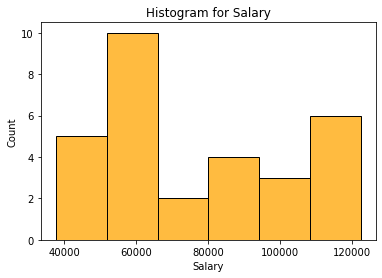

In [24]:
sns.histplot(salary_df['Salary'],color='orange')
plt.title('Histogram for Salary')

Text(0.5, 1.0, 'Histogram for Salary')

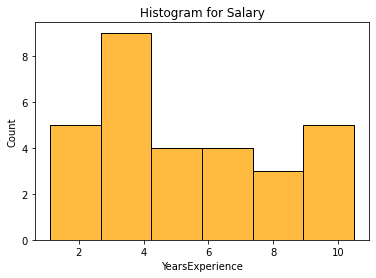

In [25]:
sns.histplot(salary_df['YearsExperience'],color='orange')
plt.title('Histogram for Salary')

Text(0.5, 1.0, 'Distribution for Salary')

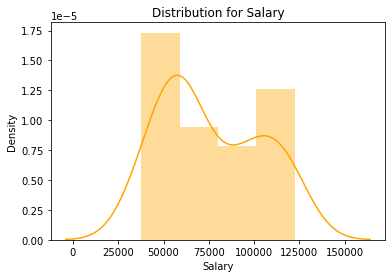

In [26]:
#Now we will check if the data is normally distributed using d distribution plot( this is used for univariate analysis)
sns.distplot(salary_df['Salary'],color='orange')
plt.title('Distribution for Salary')

Text(0.5, 1.0, 'Distribution for Years Of Experience')

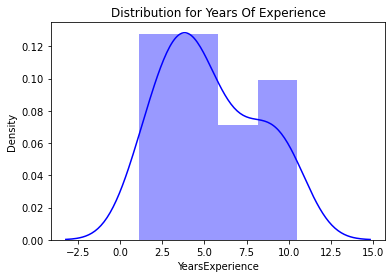

In [27]:
sns.distplot(salary_df['YearsExperience'], color='blue')
plt.title('Distribution for Years Of Experience')

<font color='green'> The dataset has normal distribution </font>

Text(0.5, 1.0, 'Regression Plot')

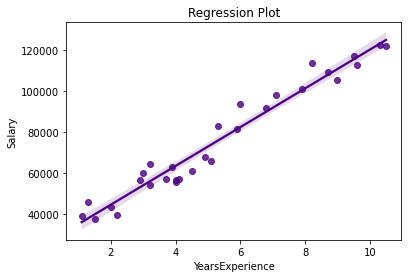

In [28]:
#Since the data has quiet anormal distribution we will move on towards the regression plot 
sns.regplot(x='YearsExperience',y='Salary',data=salary_df,color='indigo')
plt.title('Regression Plot')

- We can see there is a best fit line drawn showing positive relationship

## Model Building

In [29]:
#Creating Model using OLS (Ordinary Least Squared)
model=smf.ols('Salary~YearsExperience',data=salary_df).fit()

In [30]:
# Finding Coefficients of the Parameter 
model.params 

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [34]:
#t and p values
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [35]:
#splitting the datset
X=np.array(salary_df['YearsExperience']).reshape(-1,1)
Y=np.array(salary_df['Salary']).reshape(-1,1)

In [36]:
#Now we wil store the properties of LinearRegression() in Model variable 
Model = LinearRegression()

In [37]:
Model.fit(X,Y)

LinearRegression()

In [38]:
#Now we will store the pridicted data values of X column in predicted variable
predicted=Model.predict(X)

In [40]:
#Display Summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        17:48:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#calculating Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE=metrics.mean_absolute_error(Y,predicted)
print("Mean absolute error is {}".format(MAE))

Mean absolute error is 4644.2012894435375


## Model Prediction

In [42]:
new_data=pd.Series([1.5,9,5,4,2])
pdata=pd.DataFrame(new_data,columns=["YearsExperiance"])
pdata

,YearsExperiance
0,1.5
1,9.0
2,5.0
3,4.0
4,2.0


In [43]:
Model.predict(pdata)

array([[ 39967.14368085],
       [110841.86109176],
       [ 73042.01180594],
       [ 63592.04948449],
       [ 44692.12484158]])

- <b><font color = 'indigo'/>Infernece : </b><i><font color='blue'>The model is efficint with 95% accuray and has a mean absolute error of 4644.</font></i>

## Transformations

In [49]:
from sklearn.metrics import r2_score
Rsquare= r2_score(Y,predicted)
print("The Rsquare value is {}".format(Rsquare))

print("The intercept value is {}".format(Model.intercept_))

print("The slope value is{}".format(Model.coef_))

The Rsquare value is 0.9569566641435086
The intercept value is [25792.20019867]
The slope value is[[9449.96232146]]


### Log Transformation

In [50]:
x_log=np.log(X)
y_log=np.log(Y)

In [51]:
model1=LinearRegression()

In [52]:
model1.fit(x_log,y_log)

LinearRegression()

In [53]:
log_pred=model1.predict(x_log)

In [54]:
log_r2score=r2_score(y_log,log_pred)
print("The rsquare value after transforminh the variables into log is {}".format(log_r2score))

The rsquare value after transforminh the variables into log is 0.9052150725817151


### Square Transformation

In [55]:
x_sq=X*X
y_sq=Y*Y

In [56]:
model2=LinearRegression()

In [57]:
model2.fit(x_sq,y_sq)

LinearRegression()

In [59]:
sq_pred=model2.predict(x_sq)

In [60]:
sq_r2core=r2_score(y_sq,sq_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sq_r2core))

The rsquare value after transforminh the variables into squares is 0.9540880842110778


### Using Square Root Transformation

In [61]:
x_sqrt=np.sqrt(X)
y_sqrt=np.sqrt(Y)

In [62]:
model3=LinearRegression()

In [63]:
model3.fit(x_sqrt,y_sqrt)

LinearRegression()

In [64]:
sqrt_pred=model3.predict(x_sqrt)

In [65]:
sqrt_r2core=r2_score(y_sqrt,sqrt_pred)
print("The rsquare value after transforminh the variables into squares is {}".format(sqrt_r2core))

The rsquare value after transforminh the variables into squares is 0.9419490138976824


In [66]:
pd.DataFrame({"models":['model','model(Log)','model(squre)','model(squareroot)'],"rsquare value":[Rsquare,log_r2score,sq_r2core,sqrt_r2core]})

,models,rsquare value
0,model,0.956957
1,model(Log),0.905215
2,model(squre),0.954088
3,model(squareroot),0.941949


- <font color = 'blue'> We can clearly see the rsquare value variation for each model.</font>
- <font color = 'blue'> So we can select the model which can give better accuracy rate.</font>